In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# train = pd.read_csv("../input/train.csv", parse_dates = ["datetime"])
# test = pd.read_csv("../input/test.csv", parse_dates = ["datetime"])
train = pd.read_csv('train.csv', parse_dates = ['datetime'])
test = pd.read_csv('test.csv', parse_dates = ['datetime'])

In [25]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [26]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [27]:
train['year'] = train['datetime'].dt.year
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek

test['year'] = test['datetime'].dt.year
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek

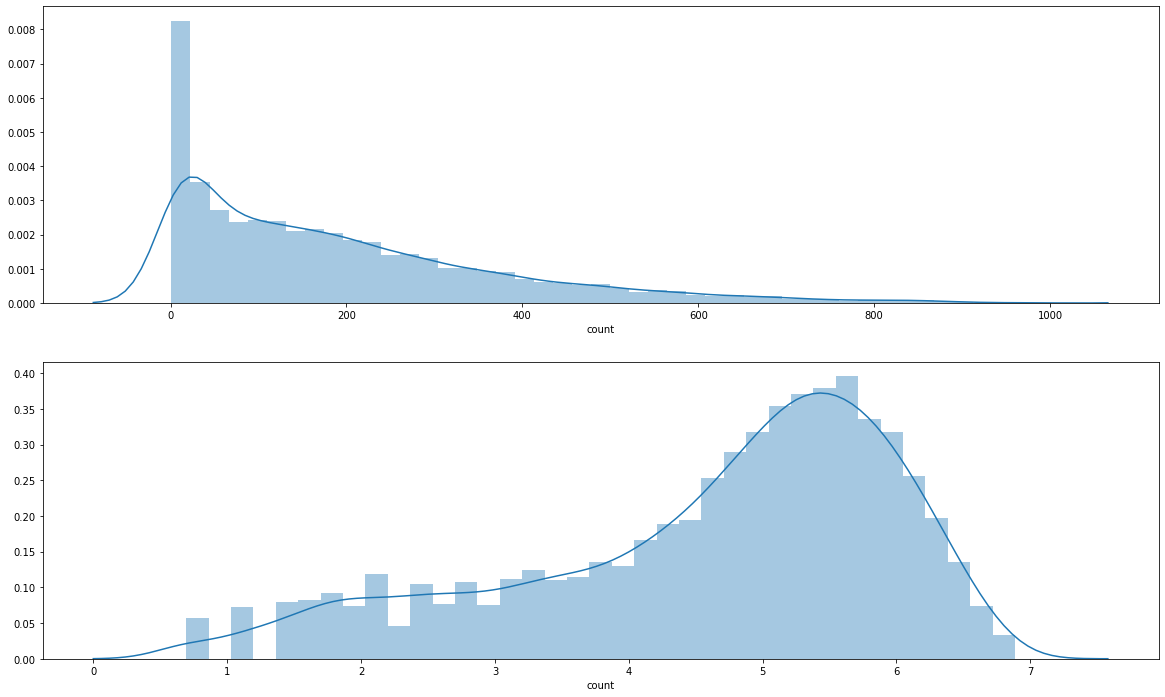

In [28]:
_, ax = plt.subplots(2, 1, figsize = (20,12))
sns.distplot(train['count'], ax = ax[0])
sns.distplot(np.log1p(train['count']),ax = ax[1])

In [29]:
y_train = np.log1p(y_train)
train.drop(['datetime', 'windspeed', 'casual', 'registered', 'count'], 1, inplace=True)
test.drop(["datetime", "windspeed"], 1, inplace=True)

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(train,y_train)
preds = rf.predict(test)

In [31]:
# submission=pd.read_csv('../input/sampleSubmission.csv')
submission=pd.read_csv("sampleSubmission.csv")
submission['count'] = np.expm1(preds)
# submission.to_csv('bike_baseline_rf.csv', index=False)